# Creating a timeseries gif using Landsat Satelite images

## Searching for scenes

In [2]:
from landsatxplore.api import API
import os

dp = os.environ.get('pub_data')
dp = dp + 'landsat_data/'

# Your USGS  credentials
username = os.environ.get('USGS_USERNAME')
password = os.environ.get('USGS_PASSWORD')

# Initialize a new API instance
api = API(username, password)

# Perform a request
response = api.request(endpoint="dataset-catalogs")
print(response)

{'EE': 'EarthExplorer', 'GV': 'GloVis', 'HDDS': 'HDDS Explorer'}


In [3]:
results = []

# Datasets for Landsat 5, 7, 8 and 9
datasets = ["landsat_tm_c2_l2", "landsat_etm_c2_l2", "landsat_ot_c2_l2"]

for dataset in datasets:
    scenes = api.search(
        
        dataset=dataset,
        latitude=29.6546,
        longitude=91.1173,
        start_date='1980-01-01',
        end_date='2023-12-31',
        max_cloud_cover=100,
        max_results=10000
    )

    results.extend(scenes)

    print(len(results))

939
2310
3179


In [4]:
import pandas as pd

# Create a DataFrame from the scenes
df_scenes = pd.DataFrame(results)

# Get scene tier 
df_scenes['tier'] = [int(x[-1]) for x in df_scenes["display_id"]]

# Get satellite
df_scenes['satellite'] = [int(str(x)[-1]) for x in df_scenes['satellite']]

# Get necessary columns
df_scenes = df_scenes[['display_id','wrs_path', 'wrs_row','satellite','cloud_cover','tier','acquisition_date']]
df_scenes.columns = ['id','path', 'row','satellite','cloud_cover','tier','date']

# Get year and month
df_scenes['year'] = pd.to_datetime(df_scenes['date']).dt.year
df_scenes['month'] = pd.to_datetime(df_scenes['date']).dt.month

df_scenes.sort_values('date', ascending=True, inplace=True)

df_scenes.to_csv(dp + 'landsat_scenes_sa.csv', index=False)
df_scenes.head()

,id,path,row,satellite,cloud_cover,tier,date,year,month
938,LT05_L2SP_138039_19871208_20201015_02_T1,138,39,5,1,1,1987-12-08,1987,12
937,LT05_L2SP_138039_19871224_20201014_02_T1,138,39,5,13,1,1987-12-24,1987,12
936,LT05_L2SP_137040_19880102_20200917_02_T1,137,40,5,4,1,1988-01-02,1988,1
935,LT05_L2SP_137039_19880102_20200917_02_T1,137,39,5,36,1,1988-01-02,1988,1
934,LT05_L2SP_138039_19880109_20200917_02_T1,138,39,5,46,1,1988-01-09,1988,1


In [6]:
len(df_scenes)

36

In [5]:
import pandas as pd

df_scenes = pd.read_csv(dp + 'landsat_scenes_sa.csv')

# only summer months
df_scenes = df_scenes[(df_scenes.month >=10) | (df_scenes.month <=3)]

# only tier 1
df_scenes = df_scenes[df_scenes.tier == 1]

# only tile (175, 83)
df_scenes = df_scenes[df_scenes.row == 39]

# before 31 May 2003 for landsat 7 
df_scenes = df_scenes[(df_scenes.satellite != 7) | (df_scenes.date < '2003-05-31')]

# no landsat 4
df_scenes = df_scenes[df_scenes.satellite != 4]

#sort by cloud cover and month
df_scenes = df_scenes.sort_values(['year','cloud_cover'], ascending=True)

# get first entry for each year
df_scenes = df_scenes.groupby('year').first().reset_index()

print(len(df_scenes))

df_scenes.head(100)

36


,year,id,path,row,satellite,cloud_cover,tier,date,month
0,1987,LT05_L2SP_138039_19871208_20201015_02_T1,138,39,5,1,1,1987-12-08,12
1,1988,LT05_L2SP_138039_19880210_20200917_02_T1,138,39,5,1,1,1988-02-10,2
2,1989,LT05_L2SP_138039_19890127_20200916_02_T1,138,39,5,1,1,1989-01-27,1
3,1990,LT05_L2SP_137039_19900107_20200916_02_T1,137,39,5,1,1,1990-01-07,1
4,1991,LT05_L2SP_137039_19911212_20200915_02_T1,137,39,5,0,1,1991-12-12,12
5,1992,LT05_L2SP_137039_19920129_20200914_02_T1,137,39,5,0,1,1992-01-29,1
6,1993,LT05_L2SP_137039_19930115_20200914_02_T1,137,39,5,0,1,1993-01-15,1
7,1994,LT05_L2SP_137039_19940102_20200913_02_T1,137,39,5,1,1,1994-01-02,1
8,1995,LT05_L2SP_137039_19950105_20200912_02_T1,137,39,5,2,1,1995-01-05,1
9,1996,LT05_L2SP_138039_19960131_20200911_02_T1,138,39,5,1,1,1996-01-31,1


## Downloading scenes 

In [17]:
from landsatxplore.earthexplorer import EarthExplorer

# Initialize the API
ee = EarthExplorer(username, password)

# Select the first scene
for i,ID in enumerate(df_scenes.id):

    print("year: {} | ID: {}".format(df_scenes.year[i],ID))

    # Download the scene 
    try: 
        ee.download(ID, output_dir= dp)
        print('{} succesful'.format(ID))
        
    # Additional error handling
    except:
        if os.path.isfile(dp + '{}.tar'.format(ID)):
            print('{} error but file exists'.format(ID))
        else:
            print('{} error'.format(ID))

    print()

ee.logout()

year: 1987 | ID: LT05_L2SP_138039_19871208_20201015_02_T1


100%|██████████| 556M/556M [01:28<00:00, 6.59MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19871208_20201015_02_T1 error but file exists

year: 1988 | ID: LT05_L2SP_138039_19880210_20200917_02_T1


575MB [01:31, 6.56MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19880210_20200917_02_T1 error but file exists

year: 1989 | ID: LT05_L2SP_138039_19890127_20200916_02_T1


587MB [01:33, 6.57MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19890127_20200916_02_T1 error but file exists

year: 1990 | ID: LT05_L2SP_137039_19900107_20200916_02_T1


100%|██████████| 639M/639M [01:41<00:00, 6.60MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19900107_20200916_02_T1 error but file exists

year: 1991 | ID: LT05_L2SP_137039_19911212_20200915_02_T1


100%|██████████| 609M/609M [01:37<00:00, 6.58MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19911212_20200915_02_T1 error but file exists

year: 1992 | ID: LT05_L2SP_137039_19920129_20200914_02_T1


100%|██████████| 669M/669M [01:46<00:00, 6.57MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19920129_20200914_02_T1 error but file exists

year: 1993 | ID: LT05_L2SP_137039_19930115_20200914_02_T1


585MB [01:33, 6.58MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19930115_20200914_02_T1 error but file exists

year: 1994 | ID: LT05_L2SP_137039_19940102_20200913_02_T1


100%|██████████| 621M/621M [01:39<00:00, 6.57MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19940102_20200913_02_T1 error but file exists

year: 1995 | ID: LT05_L2SP_137039_19950105_20200912_02_T1


650MB [01:43, 6.58MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_19950105_20200912_02_T1 error but file exists

year: 1996 | ID: LT05_L2SP_138039_19960131_20200911_02_T1


100%|██████████| 590M/590M [01:39<00:00, 6.20MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19960131_20200911_02_T1 error but file exists

year: 1997 | ID: LT05_L2SP_138039_19970101_20200910_02_T1


583MB [01:35, 6.44MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19970101_20200910_02_T1 error but file exists

year: 1998 | ID: LT05_L2SP_138039_19980221_20200909_02_T1


100%|██████████| 597M/597M [01:38<00:00, 6.37MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_19980221_20200909_02_T1 error but file exists

year: 1999 | ID: LE07_L2SP_137039_19991124_20200918_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 656M/656M [01:44<00:00, 6.57MB/s] 


None of the archived ids succeeded! Update necessary!
LE07_L2SP_137039_19991124_20200918_02_T1 error but file exists

year: 2000 | ID: LE07_L2SP_137039_20001228_20200917_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 680M/680M [01:48<00:00, 6.59MB/s] 


None of the archived ids succeeded! Update necessary!
LE07_L2SP_137039_20001228_20200917_02_T1 error but file exists

year: 2001 | ID: LE07_L2SP_137039_20010129_20200917_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


677MB [01:47, 6.59MB/s]                            


None of the archived ids succeeded! Update necessary!
LE07_L2SP_137039_20010129_20200917_02_T1 error but file exists

year: 2002 | ID: LE07_L2SP_137039_20020201_20200917_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


694MB [01:50, 6.59MB/s]                            


None of the archived ids succeeded! Update necessary!
LE07_L2SP_137039_20020201_20200917_02_T1 error but file exists

year: 2003 | ID: LE07_L2SP_137039_20030103_20200916_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 671M/671M [01:47<00:00, 6.57MB/s]  


None of the archived ids succeeded! Update necessary!
LE07_L2SP_137039_20030103_20200916_02_T1 error but file exists

year: 2004 | ID: LT05_L2SP_137039_20041215_20200902_02_T1


671MB [01:47, 6.54MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20041215_20200902_02_T1 error but file exists

year: 2005 | ID: LT05_L2SP_137039_20050217_20200902_02_T1


100%|██████████| 660M/660M [02:08<00:00, 5.39MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20050217_20200902_02_T1 error but file exists

year: 2006 | ID: LT05_L2SP_137039_20060220_20201008_02_T1


676MB [02:22, 4.98MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20060220_20201008_02_T1 error but file exists

year: 2007 | ID: LT05_L2SP_137039_20070106_20200830_02_T1


649MB [01:43, 6.59MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20070106_20200830_02_T1 error but file exists

year: 2008 | ID: LT05_L2SP_138039_20080116_20200829_02_T1


100%|██████████| 587M/587M [01:33<00:00, 6.57MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_20080116_20200829_02_T1 error but file exists

year: 2009 | ID: LT05_L2SP_137039_20091111_20200825_02_T1


100%|██████████| 625M/625M [01:39<00:00, 6.60MB/s] 


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20091111_20200825_02_T1 error but file exists

year: 2010 | ID: LT05_L2SP_138039_20100206_20200825_02_T1


598MB [01:35, 6.59MB/s]                            


None of the archived ids succeeded! Update necessary!
LT05_L2SP_138039_20100206_20200825_02_T1 error but file exists

year: 2011 | ID: LT05_L2SP_137039_20110202_20200823_02_T1


100%|██████████| 652M/652M [01:44<00:00, 6.57MB/s]  


None of the archived ids succeeded! Update necessary!
LT05_L2SP_137039_20110202_20200823_02_T1 error but file exists

year: 2013 | ID: LC08_L2SP_137039_20131208_20200912_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


995MB [02:38, 6.58MB/s]                             


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20131208_20200912_02_T1 error but file exists

year: 2014 | ID: LC08_L2SP_137039_20140109_20200912_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


989MB [02:37, 6.57MB/s]                             


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20140109_20200912_02_T1 error but file exists

year: 2015 | ID: LC08_L2SP_137039_20151230_20200908_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 972M/972M [02:35<00:00, 6.58MB/s]  


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20151230_20200908_02_T1 error but file exists

year: 2016 | ID: LC08_L2SP_138039_20160207_20200907_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


934MB [01:59, 8.20MB/s]                             


None of the archived ids succeeded! Update necessary!
LC08_L2SP_138039_20160207_20200907_02_T1 error but file exists

year: 2017 | ID: LC08_L2SP_137039_20171219_20200902_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


948MB [01:41, 9.80MB/s]                            


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20171219_20200902_02_T1 error but file exists

year: 2018 | ID: LC08_L2SP_137039_20180120_20200902_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 947M/947M [02:42<00:00, 6.10MB/s]  


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20180120_20200902_02_T1 error but file exists

year: 2019 | ID: LC08_L2SP_137039_20190312_20200829_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 985M/985M [01:19<00:00, 13.0MB/s]  


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20190312_20200829_02_T1 error but file exists

year: 2020 | ID: LC08_L2SP_137039_20201024_20201105_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 981M/981M [01:22<00:00, 12.5MB/s]  


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20201024_20201105_02_T1 error but file exists

year: 2021 | ID: LC08_L2SP_137039_20210128_20210305_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 950M/950M [03:14<00:00, 5.14MB/s]  


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20210128_20210305_02_T1 error but file exists

year: 2022 | ID: LC08_L2SP_137039_20220320_20220329_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


990MB [05:22, 3.22MB/s]                             


None of the archived ids succeeded! Update necessary!
LC08_L2SP_137039_20220320_20220329_02_T1 error but file exists

year: 2023 | ID: LC09_L2SP_138039_20230101_20230315_02_T1
Download failed with dataset id 1 of 3. Re-trying with the next one.


100%|██████████| 931M/931M [06:19<00:00, 2.57MB/s]  


None of the archived ids succeeded! Update necessary!
LC09_L2SP_138039_20230101_20230315_02_T1 error but file exists



In [12]:
# Check that all files have been downloaded
for i,ID in enumerate(df_scenes.id):
    if os.path.isfile(dp + '{}.tar'.format(ID)):
        print("year: {} succesful".format(df_scenes.year[i]))
    else:
        print("year: {} error".format(df_scenes.year[i]))

year: 1987 succesful
year: 1988 succesful
year: 1989 succesful
year: 1990 succesful
year: 1991 succesful
year: 1992 succesful
year: 1993 succesful
year: 1994 succesful
year: 1995 succesful
year: 1996 succesful
year: 1997 succesful
year: 1998 succesful
year: 1999 succesful
year: 2000 succesful
year: 2001 succesful
year: 2002 succesful
year: 2003 succesful
year: 2004 succesful
year: 2005 succesful
year: 2006 succesful
year: 2007 succesful
year: 2008 succesful
year: 2009 succesful
year: 2010 succesful
year: 2011 succesful
year: 2013 succesful
year: 2014 succesful
year: 2015 succesful
year: 2016 succesful
year: 2017 succesful
year: 2018 succesful
year: 2019 succesful
year: 2020 succesful
year: 2021 succesful
year: 2022 succesful
year: 2023 succesful


In [13]:
import tarfile

for ID in df_scenes.id:
    # Extract files from tar archive
    tar = tarfile.open(dp + '{}.tar'.format(ID))
    tar.extractall(dp + '{}'.format(ID))
    tar.close()

## Explore landsat scenes

In [7]:
import tifffile as tiff
import numpy as np


def get_rgb(ID):
    
    # Load Blue (B2), Green (B3) and Red (B4) bands

    if ID[0:4] in ['LT05','LE07']:
        # Landsat 5 and 7
        R = tiff.imread(dp + '{}/{}_SR_B3.TIF'.format(ID, ID))
        G = tiff.imread(dp + '{}/{}_SR_B2.TIF'.format(ID, ID))
        B = tiff.imread(dp + '{}/{}_SR_B1.TIF'.format(ID, ID))
    else:
        # Landsat 8 and 9
        R = tiff.imread(dp + '{}/{}_SR_B4.TIF'.format(ID, ID))
        G = tiff.imread(dp + '{}/{}_SR_B3.TIF'.format(ID, ID))
        B = tiff.imread(dp + '{}/{}_SR_B2.TIF'.format(ID, ID))

    # Stack and scale bands
    RGB = np.dstack((R, G, B))
    RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

    # Clip to enhance contrast
    RGB = np.clip(RGB,0,0.3)/0.3
    
    return RGB

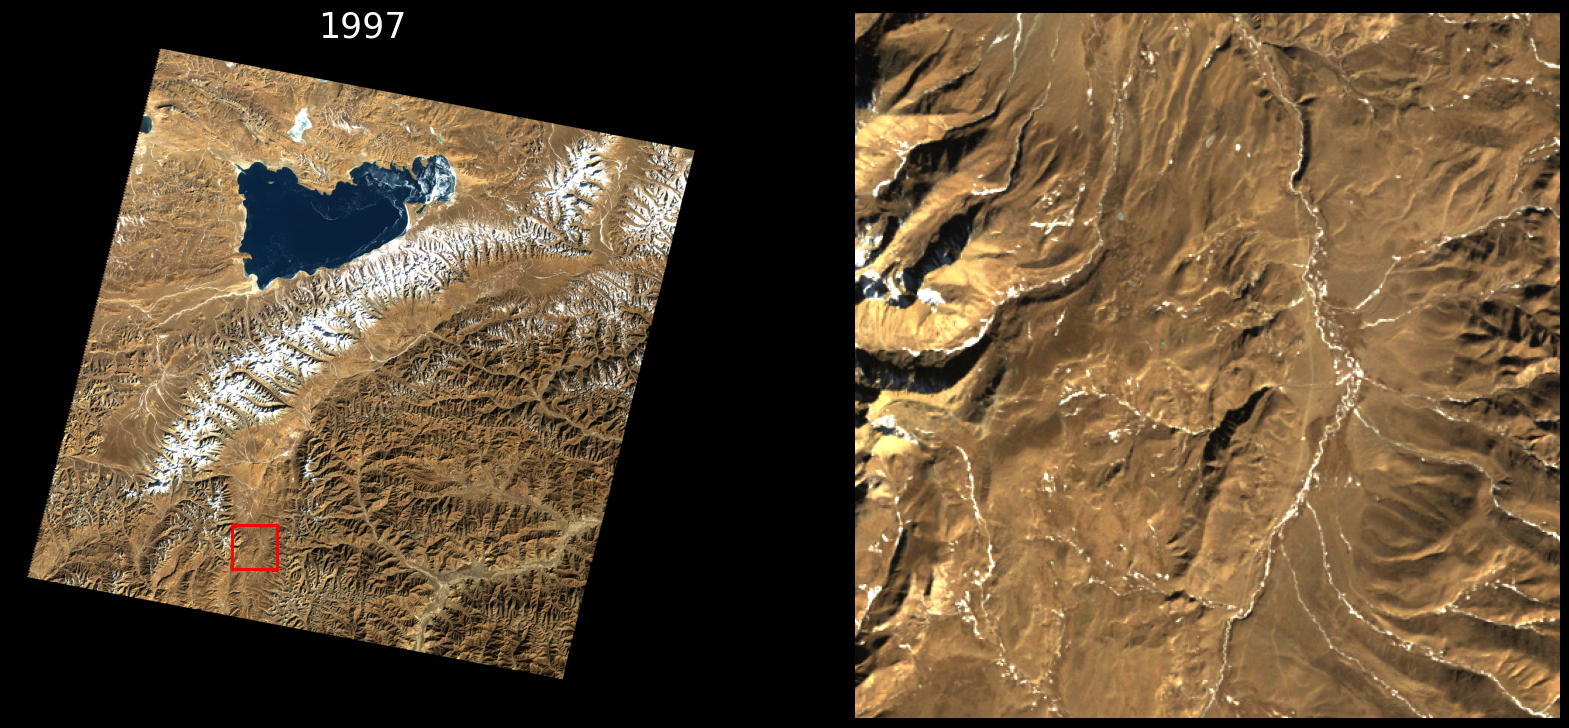

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(1,2,figsize=(20, 20))

# Add circle to image at pixel coordinates
rgb = get_rgb(df_scenes.id[10])
ax[0].imshow(rgb)
ax[0].set_title(df_scenes.year[10],size=25)

# Outline area of interest
x,y,h,w = 2500,5400,500,500
rect = mpl.patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')

ax[0].add_patch(rect)

# Crop area of interest
crop_rgb = rgb[y:y+h, x:x+w]

ax[1].imshow(crop_rgb)

ax[0].set_axis_off()
ax[1].set_axis_off()

## Creating timeseries gif 

In [9]:
import rasterio as rio

ID = df_scenes.id[10]
band = rio.open(dp + '{}/{}_SR_B3.TIF'.format(ID, ID))

# Get utm coordinates from pixel
utmx, utmy = band.xy(y,x)
print(utmx, utmy)

237000.0 3298800.0


In [10]:
images = []

for ID in df_scenes.id:

    # Get RGB image
    rgb = get_rgb(ID)

    # Get pixel coordinates of area of interest
    band = rio.open(dp + '{}/{}_SR_B3.TIF'.format(ID, ID))
    y,x = band.index(utmx,utmy)

    # Crop area of interest
    crop_rgb = rgb[y:y+h, x:x+w]

    images.append(crop_rgb)

: 

In [ ]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0, w), ylim=(0, h))

def animate(i):
    """Returns the i-th frame of the animation"""

    ax.imshow(images[i])

    title = "Year: {}".format(df_scenes.year[i])
    ax.set_title(title,size = 50)
    ax.set_axis_off()

    return ax

anim = animation.FuncAnimation(fig, animate, frames=len(images), interval=1000)
anim.save(dp + 'landsat_timeseries_southafrica.gif', writer='Pillow')